In [1]:
%load_ext autoreload
%autoreload 2
import distance
import pandas as pd
import numpy as np
import data_tables
import interpolation
import age_analysis
import seaborn as sns
from matplotlib import pyplot as plt
import alignment
from IPython.display import display, Markdown
import math
import simulation
from skbio import TreeNode
from skbio.diversity import beta_diversity
import skbio.diversity 
from io import StringIO
import local_dtw
import pcoa as my_pcoa
from skbio.stats.distance import DistanceMatrix
from skbio.stats.ordination import pcoa
from statsmodels.stats import contingency_tables
import random
import scipy
import sklearn
import Config
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from statannot import add_stat_annotation


/home/ranarmoni/anaconda3/envs/MicrobiomeAlignment/lib/python3.6/site-packages/skbio/util/_testing.py:16: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
DI_metadata = pd.read_pickle("./precomputed_data/DI_metadata")
DI_counts = pd.read_pickle("./precomputed_data/DI_counts")

In [6]:
config3 = Config.Config(abundance_threshold = 0.005,max_age = 730,min_max_age=600,window_size = 10,top_predictors_for_age_analysis=0)

In [ ]:
DI_data = data_tables.ta_data(DI_metadata,counts=DI_counts,config=config3)

In [11]:
DI_distance = distance.calculate_bray_curtis_table(DI_data.abundance,DI_data.abundance)      

# pairwise matrix example

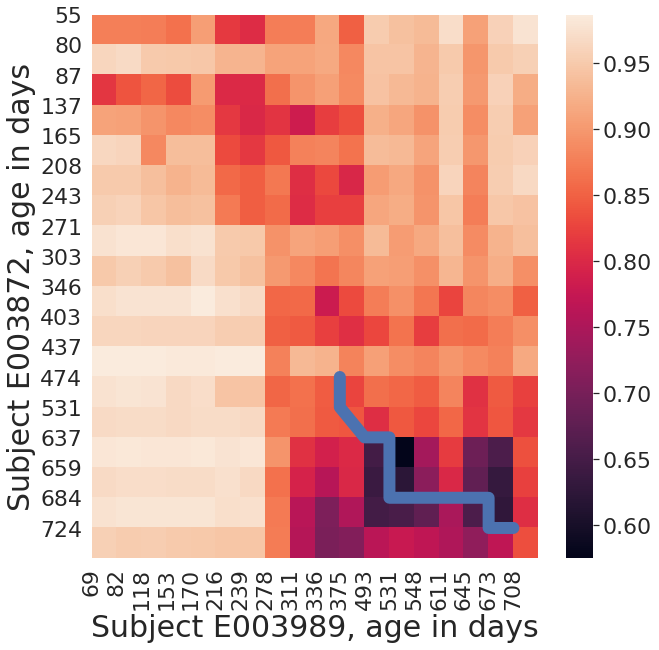

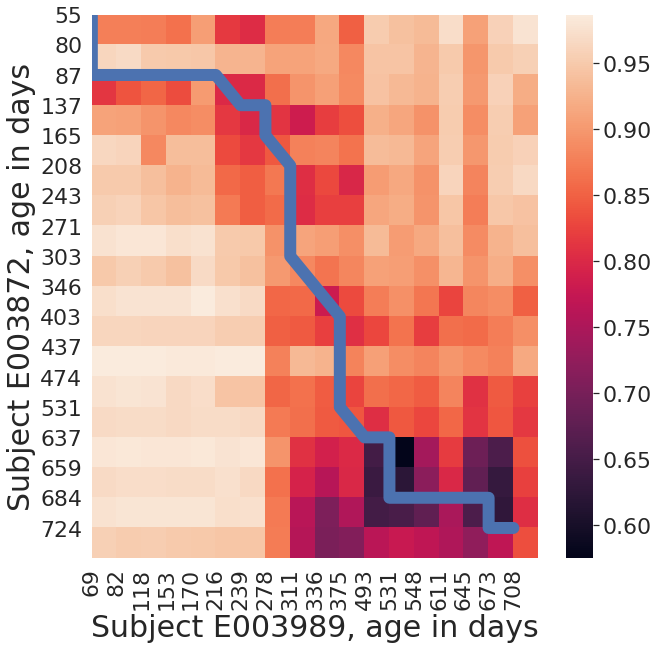

In [71]:
def plot_distance_and_alignment(data,distance_matrix,subject1,subject2):
    plt.rc('font', size=13)
    samples1, samples2 = data.sample_ids_by_subject(subject1),data.sample_ids_by_subject(subject2)
    ages1,ages2 = data.get_ages_of_samples(samples1),data.get_ages_of_samples(samples2)
    dist = distance_matrix.loc[:,samples1].loc[samples2,:]
    threshold = np.mean(dist.quantile(q=0.3))
    local_alignment_object = alignment.align(x=None,y=None,distance_matrix=dist,how="local",threshold=threshold)
    plt.show()
    sns.heatmap(dist)
    plt.xlabel(f"Subject {subject2}, age in days",fontsize=30)
    plt.ylabel(f"Subject {subject1}, age in days",fontsize=30)
    plt.xticks(ticks=[i for i in range(len(ages1))],labels=ages1)
    plt.yticks(ticks=[i for i in range(len(ages2))],labels=ages2)
    ii, jj = local_alignment_object.ii, local_alignment_object.jj
    jj.reverse()
    ii.reverse()
    ii,jj = np.asarray(ii), np.asarray(jj)
    plt.plot(jj,ii,linewidth=12)
    plt.show()
    sns.heatmap(dist)
    plt.xlabel(f"Subject {subject2}, age in days",fontsize=30)
    plt.ylabel(f"Subject {subject1}, age in days",fontsize=30)
    plt.xticks(ticks=[i for i in range(len(ages2))],labels=ages1)
    plt.yticks(ticks=[i for i in range(len(ages1))],labels=ages2)
    global_alignment_object = alignment.align(x=None,y=None,distance_matrix=dist,how="global",threshold=0)
    plt.plot(global_alignment_object.index2, global_alignment_object.index1,linewidth=12)
    plt.show()
      
    
    
distance_matrix = DI_distance
data = DI_data
subject1, subject2 = data.all_subjects()[2], data.all_subjects()[3]
plot_distance_and_alignment(data,distance_matrix,subject1,subject2)